## Python API - WeatherPY

Observations based on data



In [66]:
#File for Python-API - WeatherPY

import pandas as pd
import random as random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from citipy import citipy
import requests
import json
%matplotlib inline

# Get API key(s)

from config import wkey

In [2]:
# Base URL
                                                                                              
url = "http://api.openweathermap.org/data/2.5/weather?"
                                                                                               

In [3]:
#plotting routine with regression (setting up as a function)
#below function takes 2 sets of x and y data and generates a scatter plot for each.  Then performs a linear regression 
#and returns a dataframe with the regression results
#x and y are number pairs
#data is the name of what is being plotted (like temperature).  used as Y axis label and as part of title
#filename is filename used to save data.  Always assumes presence of directory called data located with file
#prints results of regression below graphs

def plotter(x1,y1,x2,y2,Data, filename):
   
   #plotting data set x1 and y1

    (slope_N, intercept_N, rvalue_N, pvalue_N, stderr_N) = linregress(x1,y1)
    regress_values_N = x1 * slope_N + intercept_N
    line_eq = "y = " + str(round(slope_N,2)) + "x + " + str(round(intercept_N,2))+", r = " +str(round(rvalue_N,2))
    max_y = y1.max()
    min_x = x1.min()
    fig = plt.figure(figsize = (15,4))
    ax1 = fig.add_subplot(121)
    ax1.scatter(x1, y1, s=5)
    plt.plot(x1,regress_values_N,"r-")
    plt.annotate(line_eq,(min_x+1,max_y-1),fontsize=11,color="red") #writes to coordinates on graph
    plt.xlabel("Latitude (degrees)")
    plt.ylabel(f"{Data} ")
    plt.title(f"{Data} versus Latitude /n for Northern Hemisphere")

  #plotting data set x2 and y2
    (slope_S, intercept_S, rvalue_S, pvalue_S, stderr_S) = linregress(x2,y2)
    regress_values_S = x2 * slope_S + intercept_S
    line_eq = "y = " + str(round(slope_S,2)) + "x + " + str(round(intercept_S,2))+", r = " +str(round(rvalue_S,2))
    max_y = y2.max()
    min_x = x2.min()
    #plotting second data set
    ax2 = fig.add_subplot(122)
    ax2.scatter(x2, y2, s=5)
    plt.plot(x2,regress_values_S,"r-")
    plt.annotate(line_eq,(min_x+1,max_y-1),fontsize=11,color="red") #writes to coordinates on graph
    plt.xlabel("Latitude (degrees)")
    plt.ylabel(f"{Data}")
    plt.title(f"{Data} versus Latitude /n for Southern Hemisphere")
    plt.savefig(f"data/{filename}.png")
    plt.show()


    Result_Temp_df = pd.DataFrame({"Slope":[slope_N, slope_S], "Intercept":[intercept_N, intercept_S], 
                                                         "r-value":[rvalue_N, rvalue_S], "p-value":[pvalue_N, pvalue_S]})

    Result_Temp_df["Hemisphere"] =["Northern", "Southern"]
    Result_Temp_df = Result_Temp_df[["Hemisphere", "Slope", "Intercept", "r-value", "p-value"]]

    print(f"Correlation Results")
    print("")

    print(Result_Temp_df)
    return Result_Temp_df; 

In [4]:
#Creating empty dataframe
weather_summary_df = pd.DataFrame(columns = ["City", "Country", "Lat","Long", "Temp", "Humidity", "%Cloud","Wind_Speed"])
i=0 #counter for number of issues in try
#loop to retrieve data
while len(weather_summary_df)<500+1:
    #generating latitute (-90 to 90) and longitude points (-180 to 180)
    lat_point = round(180*(random.random())-90,4) #range*random(0-1)+offset
    long_point = round(360*(random.random())-180,4)
    
    #using citipy to find nearest city and country code
    city = citipy.nearest_city(lat_point, long_point)
    city_choice = city.city_name
    country_choice = city.country_code
    
    #if to make certain don't pick same city twice
    if city_choice not in weather_summary_df.values:
        
        #establishing query key for openweatherapi
        query_url = f"{url}q={city_choice},{country_choice}&units=metric&appid={wkey}"
        #getting response for url formatted as json
        response = requests.get(query_url).json()
        #inserting exception handling (does seem to happen)
        try:
            temp = response["main"]["temp"]     
            humidity = response["main"]["humidity"]
            clouds = response["clouds"]["all"]
            wind_speed = response["wind"]["speed"]
            #updating dataframe with data
            weather_summary_df = weather_summary_df.append({"City":city_choice, "Country":country_choice, "Lat":lat_point, "Long":long_point, 
                            "Temp":temp, "Humidity":humidity,"%Cloud":clouds,"Wind_Speed":wind_speed}, ignore_index = True)
        except KeyError:
            i+=1
            #print(f"problem with key on loop {i}")  #alert exception happened
            

In [43]:
#setting hemisphere's

weather_summary_df.loc[(weather_summary_df["Lat"]>0),"Hemisphere"]="Northern"
weather_summary_df.loc[(weather_summary_df["Lat"]<=0),"Hemisphere"]="Southern"

weather_summary_df.to_csv("data/weather.csv", index=False, header=True)

print(f"Table of Results, Including City and Country with Weather Conditions")
weather_summary_df


Table of Results, Including City and Country with Weather Conditions


,City,Country,Lat,Long,Temp,Humidity,%Cloud,Wind_Speed,Hemisphere
0,dulce grande,mx,23.4029,-102.0946,17,82,75,4.60,Northern
1,jamestown,sh,-19.9396,-11.6470,17.3,75,70,7.47,Southern
2,rikitea,pf,-75.6590,-123.7150,20.28,76,0,8.70,Southern
3,punta arenas,cl,-77.5830,-106.5786,1.83,91,100,5.70,Southern
4,jalingo,ng,8.9629,10.7497,22.69,90,91,0.80,Northern
...,...,...,...,...,...,...,...,...,...
496,harlingen,nl,55.0900,5.3565,14.73,93,90,2.10,Northern
497,monrovia,lr,2.3571,-12.9297,24,100,75,4.91,Northern
498,nakonde,zm,-9.4098,32.2758,9.08,97,0,3.16,Southern
499,den helder,nl,54.7363,3.9827,16.98,88,90,4.10,Northern


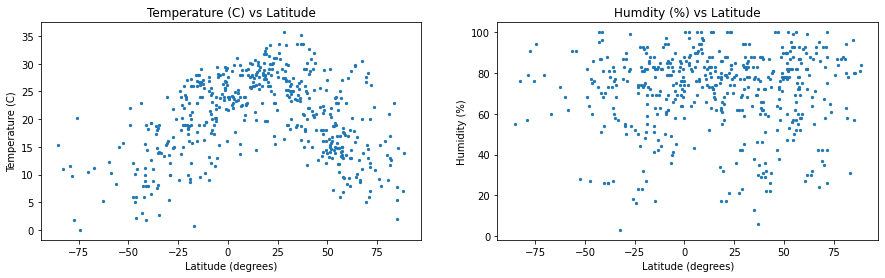

In [41]:
#Plotting overall summary plots (no regression)

#plotting two columns of plots to save space

#Temperature and Humidity as first pair
x1 = weather_summary_df["Lat"].astype(float)
y1 = weather_summary_df["Temp"].astype(float)

x2 = x1
y2 = weather_summary_df["Humidity"].astype(float)
#plot 1
fig = plt.figure(figsize = (15,4))
ax1 = fig.add_subplot(121)
ax1.scatter(x1, y1, s=5)
plt.xlabel("Latitude (degrees)")
plt.ylabel(f"Temperature (C)")
plt.title(f"Temperature (C) vs Latitude")
#plot 2    
ax2 = fig.add_subplot(122)
ax2.scatter(x2, y2, s=5)
plt.xlabel("Latitude (degrees)")
plt.ylabel(f"Humidity (%)")
plt.title(f"Humdity (%) vs Latitude")
plt.savefig(f"data/Temp_and_Hum.png")

plt.show()

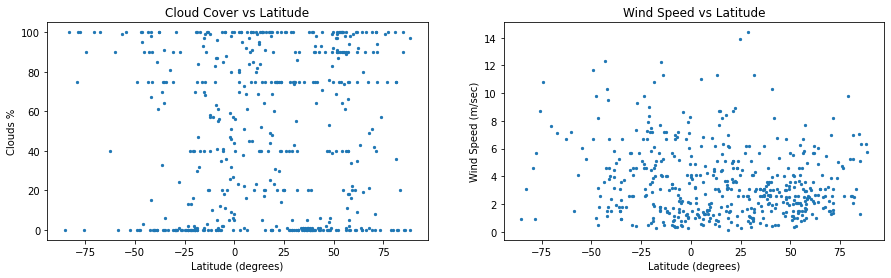

In [33]:
#plotting two columns of plots to save space

#Temperature and Humidity as first pair
x1 = weather_summary_df["Lat"].astype(float)
y1 = weather_summary_df["%Cloud"].astype(float)

x2 = x1
y2 = weather_summary_df["Wind_Speed"].astype(float)
#plot 1
fig = plt.figure(figsize = (15,4))
ax1 = fig.add_subplot(121)
ax1.scatter(x1, y1, s=5)
plt.xlabel("Latitude (degrees)")
plt.ylabel(f"Clouds %")
plt.title(f"Cloud Cover vs Latitude")
#plot 2    
ax2 = fig.add_subplot(122)
ax2.scatter(x2, y2, s=5)
plt.xlabel("Latitude (degrees)")
plt.ylabel(f"Wind Speed (m/sec)")
plt.title(f"Wind Speed vs Latitude")
plt.savefig(f"data/Cloud_and_Windspeed.png")

plt.show()

## Temperatures in Northern and Southern Latitudes

Temperature vs Latitude
Northern and Southern Hemisphere


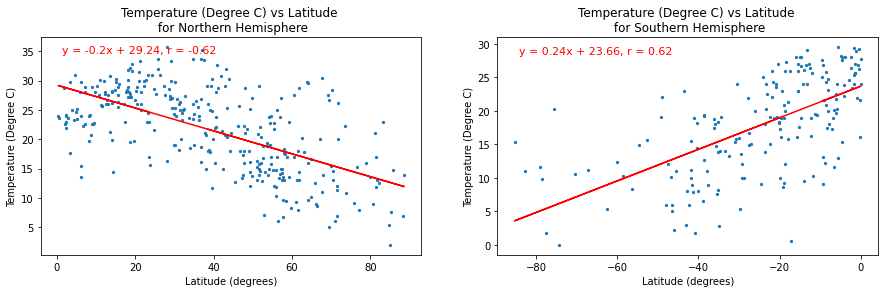

Correlation of Temperature (Degree C) and Latitude in Hemispheres

  Hemisphere     Slope  Intercept   r-value       p-value
0   Northern -0.195141  29.237833 -0.615431  1.994805e-34
1   Southern  0.235267  23.664492  0.623438  3.339282e-21


In [34]:
#TEMPERATURE PLOTS
#Extracting data for latitude and temperature for northern and sourthern hemisphere's
lat_N = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Northern"),"Lat"].astype(float)
temp_N = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Northern"),"Temp"].astype(float)

lat_S = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Southern"),"Lat"].astype(float)
temp_S = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Southern"),"Temp"].astype(float)

Temp_Result_df = []
Param = "Temperature (Degree C)"
filename = "Temp_Hemispheres"
print("Temperature vs Latitude")
print("Northern and Southern Hemisphere")
Temp_Result_df = plotter(lat_N,temp_N,lat_S,temp_S,Param, filename)


## Temperature Plot and Trends
From the plots the following can be seen:

1) As move closer to the equator (latitude 0) the temperature is seen to increase.

2) Since it is winter in the Northern Hemisphere the temperature is skewed towards the north (peaked above 0 latitude).  This can also be seen in teh combined plot with both hemispheres on same plot.

3) The correlation coefficients are near identical - so the model has equivalent predictive power in hemispheres.

4) The p value indicates the latitude and temperature are correlated.

######################################################################################################################

## Humidity in Northern and Southern Hemisphere

Humidity vs Latitude
For Northern and Southern Hemisphere


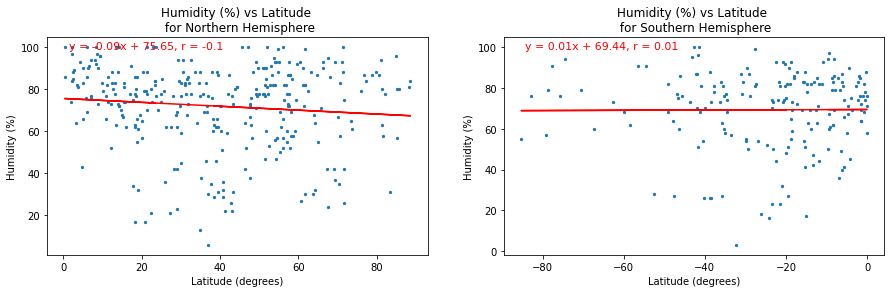

Correlation of Humidity (%) and Latitude in Hemispheres

  Hemisphere     Slope  Intercept   r-value   p-value
0   Northern -0.092781  75.646885 -0.103133  0.066673
1   Southern  0.006325  69.441783  0.006315  0.932196


In [35]:
#Humidity PLOTS
#Extracting data for latitude and humidity for northern and sourthern hemisphere's
lat_N = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Northern"),"Lat"].astype(float)
hum_N = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Northern"),"Humidity"].astype(float)

lat_S = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Southern"),"Lat"].astype(float)
hum_S = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Southern"),"Humidity"].astype(float)

Param = "Humidity (%)"
filename = "Hum_Hemispheres"
print("Humidity vs Latitude")
print("For Northern and Southern Hemisphere")
Hum_Result_df = plotter(lat_N,hum_N,lat_S,hum_S,Param, filename)

In [49]:
#Calculating some statistics for humidity data for interest
hum_ave_N = hum_N.mean()
hum_median_N = hum_N.median()
hum_var_N = hum_N.var()
hum_ave_S = hum_S.mean()
hum_median_S = hum_S.median()
hum_var_S = hum_S.var()

Stat_Hum_df=pd.DataFrame({"Hemisphere":["Northern", "Southern"], "Average":[hum_ave_N, hum_ave_S],
                         "Median":[hum_median_N,hum_median_S], "Var":[hum_var_N,hum_var_S]})

print(f"Some Statistics for Humidity Data in Hemispheres")
Stat_Hum_df


Some Statistics for Humidity Data in Hemispheres


,Hemisphere,Average,Median,Var
0,Northern,72.015773,77.0,398.629497
1,Southern,69.288043,74.0,369.178873


## Humidity Trends and Plots
1)The Humidity is not strongly correlated to the latitude.

2)The average humidity is higher in the North versus the South

3)The mean and median are offset from each other which implies the data may not be normally distributed.

###########################################################################################################


## %Cloud Cover Analysis for Hemispheres

Cloud Cover vs Latitude
Northern and Southern Hemisphere


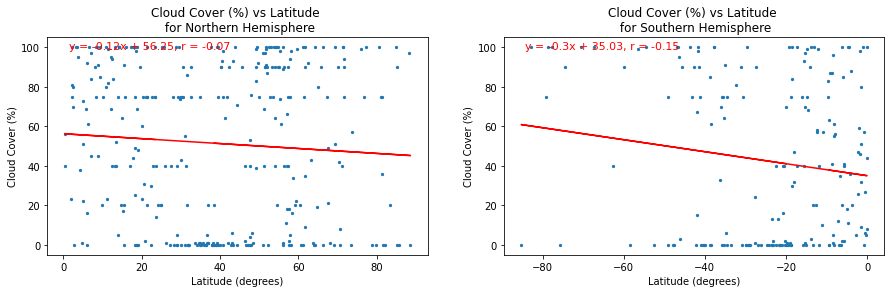

Correlation of Cloud Cover (%) and Latitude in Hemispheres

  Hemisphere     Slope  Intercept   r-value   p-value
0   Northern -0.124558  56.253309 -0.070236  0.212356
1   Southern -0.303205  35.027232 -0.146044  0.047911


In [39]:
#%Clouds PLOTS
#Extracting data for latitude and clouds for northern and sourthern hemisphere's
lat_N = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Northern"),"Lat"].astype(float)
cloud_N = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Northern"),"%Cloud"].astype(float)

lat_S = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Southern"),"Lat"].astype(float)
cloud_S = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Southern"),"%Cloud"].astype(float)

Param = "Cloud Cover (%)"
filename = "Cloud_Hemispheres"
print("Cloud Cover vs Latitude")
print("Northern and Southern Hemisphere")
Hum_Result_df = plotter(lat_N,cloud_N,lat_S,cloud_S,Param, filename)

In [61]:
#Calculating some statistics for humidity data for interest
ave_N = cloud_N.mean()
median_N = cloud_N.median()
var_N = cloud_N.var()
count_N =cloud_N.count()
ave_S = cloud_S.mean()
median_S = cloud_S.median()
var_S = cloud_S.var()
count_S = cloud_S.count()
stder_N = (var_N/count_N)**0.5
stder_S = (var_S/count_S)**0.5

Stat_Cloud_df=pd.DataFrame({"Hemisphere":["Northern", "Southern"], "Average":[ave_N, ave_S],
                         "Median":[median_N,median_S], "Var":[var_N,var_S], "Stand Error":[stder_N,stder_S],
                            "Count":[count_N,count_S]})

print(f"Some Statistics for Cloud Data in Hemispheres")
Stat_Cloud_df


Some Statistics for Cloud Data in Hemispheres


,Hemisphere,Average,Median,Var,Stand Error,Count
0,Northern,51.378549,57.0,1549.090424,2.210593,317
1,Southern,42.396739,40.0,1586.207858,2.936102,184


## Results from Cloud Cover Analysis

1) The p-vaue of <0.05 for the Southern Hemisphere shows a small correlation of cloud cover with latitude.  However the correlation coefficient r indicates a weak correlation (lots of variation around the model regression).

2) In the northern hemisphere the %cloud cover does not appear statistically to be correlated with the latitude.

3) The average cloud cover is higher in the northern hemisphere.

4) The data in the south appears more evenly distributed (median and mean are more similar).

5) More places are chosen from the south.
##############################################################################################################

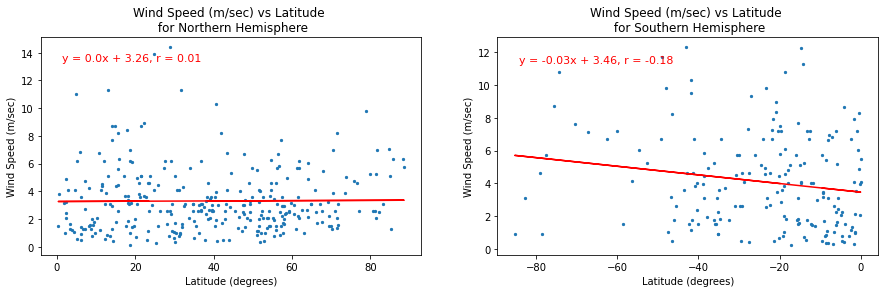

Correlation of Wind Speed (m/sec) and Latitude in Hemispheres

  Hemisphere     Slope  Intercept   r-value  p-value
0   Northern  0.001021   3.264980  0.009918  0.86038
1   Southern -0.026298   3.460434 -0.176992  0.01624


In [37]:
#Wind_Speed PLOTS
#Extracting data for latitude and clouds for northern and sourthern hemisphere's
lat_N = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Northern"),"Lat"].astype(float)
wind_N = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Northern"),"Wind_Speed"].astype(float)

lat_S = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Southern"),"Lat"].astype(float)
wind_S = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Southern"),"Wind_Speed"].astype(float)

Param = "Wind Speed (m/sec)"
filename = "Wind_Hemispheres"
Hum_Result_df = plotter(lat_N,wind_N,lat_S,wind_S,Param, filename)

In [62]:
#Calculating some statistics for humidity data for interest
ave_N = wind_N.mean()
median_N = wind_N.median()
var_N = wind_N.var()
count_N =wind_N.count()
ave_S = wind_S.mean()
median_S = wind_S.median()
var_S = wind_S.var()
count_S = wind_S.count()
stder_N = (var_N/count_N)**0.5
stder_S = (var_S/count_S)**0.5

Stat_Cloud_df=pd.DataFrame({"Hemisphere":["Northern", "Southern"], "Average":[ave_N, ave_S],
                         "Median":[median_N,median_S], "Var":[var_N,var_S], "Stand Error":[stder_N,stder_S],
                            "Count":[count_N,count_S]})

print(f"Some Statistics for wind Data in Hemispheres")
Stat_Cloud_df

Some Statistics for wind Data in Hemispheres


,Hemisphere,Average,Median,Var,Stand Error,Count
0,Northern,3.304953,2.85,5.223652,0.128368,317
1,Southern,4.099620,3.77,8.124557,0.210131,184


In [68]:
stats.chisquare([count_N,count_S], [250,250])

Power_divergenceResult(statistic=35.379999999999995, pvalue=2.712580391147996e-09)

## Observations about Wind Data

1) In the southern hemisphere the wind speed is correlated to the latitude (negative correlation), based on the pvalue.  However, the regression model does not have good predictive ability because of the large variation (low absolute r value).

2) In the northern hemisphere the wind speed is not correlated to the latitude, based on the high p-value.  The slope is near zero showing no correlation.

3) the low absolute r value for the northern data shows the regression model is a poor predictor of wind speed with latitude.

4) In all the data cases, the number of samples in the northern is larger than the southern samples.  Assuming the split should be 50/50 (randomly chosen coordinates) the chi2 test shows a significant result (pvalue<0.05).  Therefore either the sampling is not random (skewed) or there are more cities in the Northern Hemisphere to chose from (fewer duplicates in south which would be excluded.